<a href="https://colab.research.google.com/github/Nourhene-Hammami/Covid_19_chest_x_ray/blob/main/Covid_19_chest_x_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
folder_path='/content/drive/MyDrive/Colab Notebooks/projet fouilles de données/images'

file_extension='*.jpg'
file_list=glob.glob(os.path.join(folder_path,file_extension))
num_files=len(file_list)
print(f" there are   {num_files} {file_extension} files in{folder_path}." )

 there are   181 *.jpg files in/content/drive/MyDrive/Colab Notebooks/projet fouilles de données/images.


In [ ]:
import os
import json
import glob
import matplotlib.pyplot as plt
from PIL import Image

# Load JSON file containing class annotations
json_file_path = '/content/drive/MyDrive/Colab Notebooks/projet fouilles de données/annotations/imageannotation_ai_lung_bounding_boxes.json'

with open(json_file_path, 'r') as f:
    annotations = json.load(f)

# Print unique class names from annotations
unique_class_names = set(annotation['metadata']['finding'] for annotation in annotations['images'])
# Set the path to the image folder
image_folder_path = '/content/drive/MyDrive/Colab Notebooks/projet fouilles de données/images/'

# Accéder aux métadonnées d'une image exemple
example_image_data = annotations['images'][0]['metadata']

# Extraire les noms des caractéristiques
feature_names = list(example_image_data.keys())

# Afficher les noms des caractéristiques
print("Noms des caractéristiques:", feature_names)

Noms des caractéristiques: ['patientid', 'offset', 'sex', 'age', 'finding', 'survival', 'view', 'modality', 'date', 'location', 'doi', 'url', 'clinical notes']


In [ ]:
import os
import json
import glob
import matplotlib.pyplot as plt
from PIL import Image

# Load JSON file containing class annotations
json_file_path = '/content/drive/MyDrive/Colab Notebooks/projet fouilles de données/annotations/imageannotation_ai_lung_bounding_boxes.json'

with open(json_file_path, 'r') as f:
    annotations = json.load(f)

# Print unique class names from annotations
unique_class_names = set(annotation['metadata']['finding'] for annotation in annotations['images'])
print("les classes dans mon dataset:")
print(unique_class_names)

# Set the path to the image folder
image_folder_path = '/content/drive/MyDrive/Colab Notebooks/projet fouilles de données/images/'

def filter_images_by_class(class_name, annotations):
    filtered_images = []
    for annotation in annotations['images']:
        if annotation['metadata']['finding'] == class_name:
            filtered_images.append(annotation['file_name'])
    return filtered_images

def display_images(image_paths, grayscale=False):
    num_images = len(image_paths)
    num_cols = 5
    num_rows = (num_images // num_cols) + (1 if num_images % num_cols != 0 else 0)
    fig_height = num_rows * 4
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, fig_height))

    for i, ax in enumerate(axes.flat):
        if i < num_images:
            img_path = image_paths[i]
            img = Image.open(os.path.join(image_folder_path, img_path))

            # Convert image to grayscale if grayscale is True
            if grayscale:
                img = img.convert('L')

            ax.imshow(img, cmap='gray' if grayscale else None)
            ax.axis('off')

            # Get image size
            width, height = img.size
            ax.set_title(f"Size: {width}x{height}")
        else:
            ax.axis('off')

    plt.tight_layout(pad=0.5, h_pad=1.0, w_pad=0.5)
    plt.show()


# Display images for each class
for class_name in unique_class_names:
    class_images = filter_images_by_class(class_name, annotations)
    num_images = len(class_images)
    print(f"**Displaying {num_images} images for class: {class_name}")
    if class_images:
        display_images(class_images, grayscale=False)
    else:
        print("No images found for this class.")

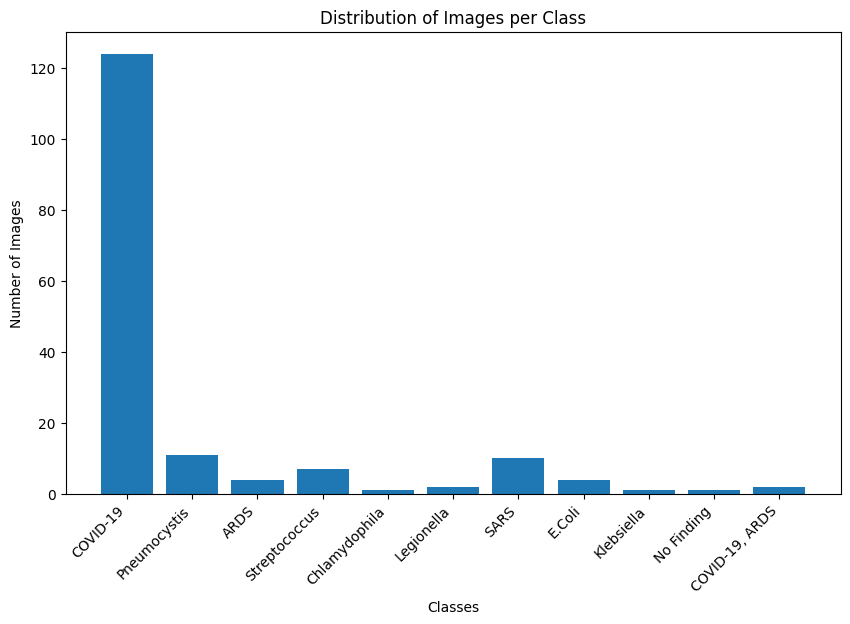

In [ ]:
def filter_images_by_class(class_name, annotations):
    filtered_images = []
    for annotation in annotations['images']:
        if annotation['metadata']['finding'] == class_name:
            filtered_images.append(annotation['file_name'])
    return filtered_images
# Count the number of images per class
class_image_counts = {class_name: len(filter_images_by_class(class_name, annotations)) for class_name in unique_class_names}

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(class_image_counts.keys(), class_image_counts.values())
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Distribution of Images per Class')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
#equilibrage de dataset

import random
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image



# Déterminer le nombre d'images maximal par classe (pour équilibrer)
max_images_per_class = max(class_image_counts.values())

# Créer un dictionnaire pour stocker les chemins d'images pour chaque classe après l'équilibrage
balanced_images = {}
sampled_images = {}

# Suréchantillonner chaque classe pour atteindre le nombre maximal d'images
for class_name, count in class_image_counts.items():
    # Vérifier si la classe a besoin d'être suréchantillonnée
    if count < max_images_per_class:
        # Calculer le nombre d'images à ajouter pour équilibrer la classe
        num_images_to_add = max_images_per_class - count
        # Choix aléatoire d'images à suréchantillonner
        sampled_images[class_name] = random.choices(filter_images_by_class(class_name, annotations), k=num_images_to_add)
        # Ajouter les images suréchantillonnées au dataset équilibré
        balanced_images[class_name] = filter_images_by_class(class_name, annotations) + sampled_images[class_name]
    else:
        # Si la classe ne nécessite pas de suréchantillonnage, ajouter simplement les images existantes au dataset équilibré
        balanced_images[class_name] = filter_images_by_class(class_name, annotations)



# Afficher les classes qui ont été équilibrées et le nombre d'images par classe
for class_name, images in balanced_images.items():
    print(f"Nombre d'images pour la classe {class_name}: {len(images)}")

# Fonction pour afficher les images équilibrées avec des bordures autour des images échantillonnées
def display_balanced_images_with_borders(balanced_images, sampled_images, num_images_per_class=15, grayscale=False):
    for class_name, images in balanced_images.items():
        num_images = min(len(images), num_images_per_class)  # Sélectionner au plus 15 images par classe
        num_cols = 5
        num_rows = (num_images // num_cols) + (1 if num_images % num_cols != 0 else 0)
        fig_height = num_rows * 4
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, fig_height))

        for i, ax in enumerate(axes.flat):
            if i < num_images:
                img_path = images[i]
                img = Image.open(os.path.join(image_folder_path, img_path))

                # Convertir l'image en niveaux de gris si grayscale est True
                if grayscale:
                    img = img.convert('L')

                # Vérifier si l'image est une nouvelle image
                is_sampled_image = img_path in sampled_images.get(class_name, [])

                # Dessiner une bordure rouge autour des images échantillonnées
                if is_sampled_image:
                    img = np.array(img)  # Convertir l'image PIL en tableau numpy
                    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Convertir RGB en BGR pour OpenCV
                    cv2.rectangle(img, (0, 0), (img.shape[1], img.shape[0]), (0, 0, 255), thickness=2)  # Ajouter une bordure rouge
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Reconvertir l'image en RGB pour matplotlib
                    img = Image.fromarray(img)  # Reconvertir l'image en format PIL pour matplotlib

                ax.imshow(img, cmap='gray' if grayscale else None)
                ax.axis('off')

                # Obtenir la taille de l'image
                width, height = img.size
                ax.set_title(f"Size: {width}x{height}")
            else:
                ax.axis('off')

        plt.tight_layout(pad=0.5, h_pad=1.0, w_pad=0.5)
        plt.suptitle(f"Class: {class_name} - Nombre d'images: {len(images)}", fontsize=16)
        plt.show()

# Appel de la fonction pour afficher les 15 premières images équilibrées avec des bordures rouges autour des images échantillonnées
display_balanced_images_with_borders(balanced_images, sampled_images, num_images_per_class=15, grayscale=False)



# Créer un nouveau dictionnaire d'annotations pour le dataset équilibré
balanced_annotations = {}

for class_name, images in balanced_images.items():
    balanced_annotations[class_name] = [{'file_name': img_path, 'metadata': {'finding': class_name}} for img_path in images]

# Enregistrer les nouvelles annotations dans un fichier JSON
balanced_json_file_path = '/content/annotations_equilibrees.json'

with open(balanced_json_file_path, 'w') as f:
    json.dump(balanced_annotations, f)

print("Les annotations pour le dataset équilibré ont été enregistrées avec succès dans le fichier:", balanced_json_file_path)



In [ ]:
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load JSON file containing class annotations
json_file_path = '/content/drive/MyDrive/Colab Notebooks/projet fouilles de données/annotations/imageannotation_ai_lung_bounding_boxes.json'

with open(json_file_path, 'r') as f:
    annotations = json.load(f)

# Set the path to the image folder
image_folder_path = '/content/drive/MyDrive/Colab Notebooks/projet fouilles de données/images/'

def filter_images_by_class(class_name, annotations):
    filtered_images = []
    for annotation in annotations['images']:
        if annotation['metadata']['finding'] == class_name:
            filtered_images.append(annotation['file_name'])
    return filtered_images

def display_images_with_contours(image_paths):
    for img_path in image_paths[:10]:
        img = cv2.imread(os.path.join(image_folder_path, img_path), cv2.IMREAD_GRAYSCALE)

        # Appliquer un seuillage pour segmenter la zone de maladie
        #threshold en niveau de gris /seuil=0 / methode de seuillage = OTSU
        _, binary_image = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Trouver les contours dans l'image binaire
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Dessiner les contours sur l'image originale
        result = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.drawContours(result, contours, -1, (0, 0, 255), 2)

        # Afficher l'image et les contours résultants à l'aide de Matplotlib
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))
        axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB), cmap='gray')
        axs[0].set_title('Image')
        axs[0].axis('off')
        axs[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        axs[1].set_title('Image with Contours')
        axs[1].axis('off')
        plt.show()

# Display images with contours for each class
for class_name in unique_class_names:
    class_images = filter_images_by_class(class_name, annotations)
    print(f"Displaying images with contours for class: {class_name}")
    if class_images:
        display_images_with_contours(class_images)
    else:
        print("No images found for this class.")



Accuracy: 0.9962121212121212
Classification Report:
                precision    recall  f1-score   support

          ARDS       1.00      1.00      1.00        24
      COVID-19       1.00      0.96      0.98        24
COVID-19, ARDS       1.00      1.00      1.00        24
 Chlamydophila       1.00      1.00      1.00        24
        E.Coli       1.00      1.00      1.00        24
    Klebsiella       1.00      1.00      1.00        24
    Legionella       1.00      1.00      1.00        24
    No Finding       1.00      1.00      1.00        24
  Pneumocystis       0.96      1.00      0.98        24
          SARS       1.00      1.00      1.00        24
 Streptococcus       1.00      1.00      1.00        24

      accuracy                           1.00       264
     macro avg       1.00      1.00      1.00       264
  weighted avg       1.00      1.00      1.00       264



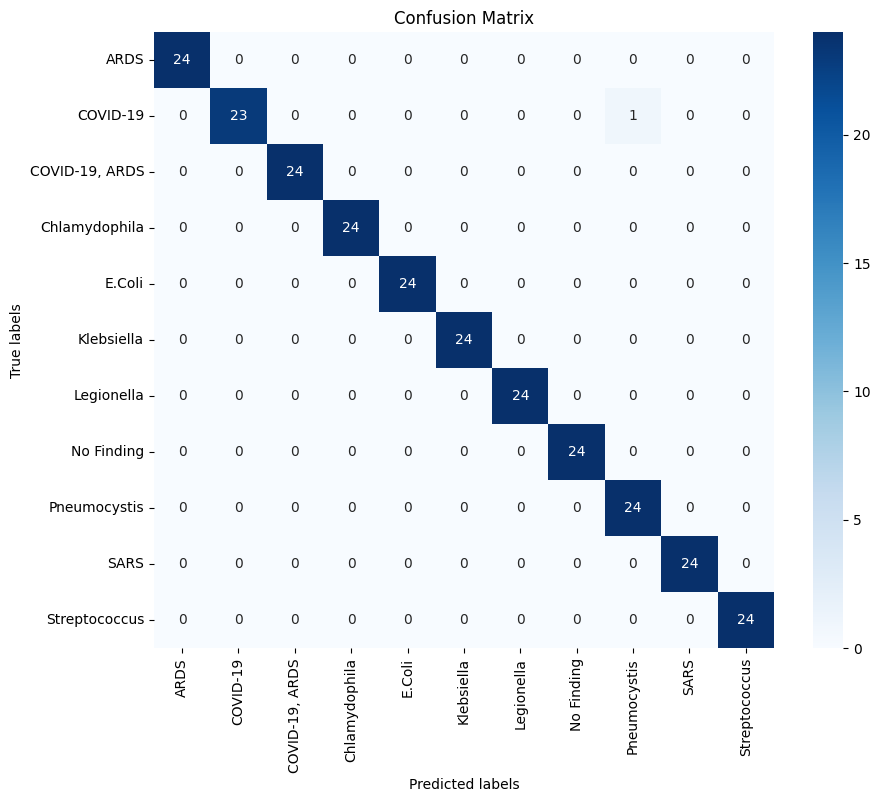

In [ ]:
#SVM pour mon dataset equilibré
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load images and labels
X = []
y = []

for class_name in annotations.keys():
    for img_info in annotations[class_name]:
        img_path = img_info['file_name']  # Extract the file name from the dictionary
        img = cv2.imread(os.path.join(image_folder_path, str(img_path)), cv2.IMREAD_GRAYSCALE)
        # Check if the image is read correctly
        if img is None:
            print(f"Failed to read image: {img_path}")
        # Preprocess the image here if needed
        img_resized = cv2.resize(img, (100, 100))
        X.append(img_resized.flatten())
        y.append(class_name)



# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
# Utilize custom_train_test_split instead of train_test_split
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 0.09090909090909091
Classification Report:
                precision    recall  f1-score   support

          ARDS       0.00      0.00      0.00         5
      COVID-19       0.09      1.00      0.17         5
COVID-19, ARDS       0.00      0.00      0.00         5
 Chlamydophila       0.00      0.00      0.00         5
        E.Coli       0.00      0.00      0.00         5
    Klebsiella       0.00      0.00      0.00         5
    Legionella       0.00      0.00      0.00         5
    No Finding       0.00      0.00      0.00         5
  Pneumocystis       0.00      0.00      0.00         5
          SARS       0.00      0.00      0.00         5
 Streptococcus       0.00      0.00      0.00         5

      accuracy                           0.09        55
     macro avg       0.01      0.09      0.02        55
  weighted avg       0.01      0.09      0.02        55



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


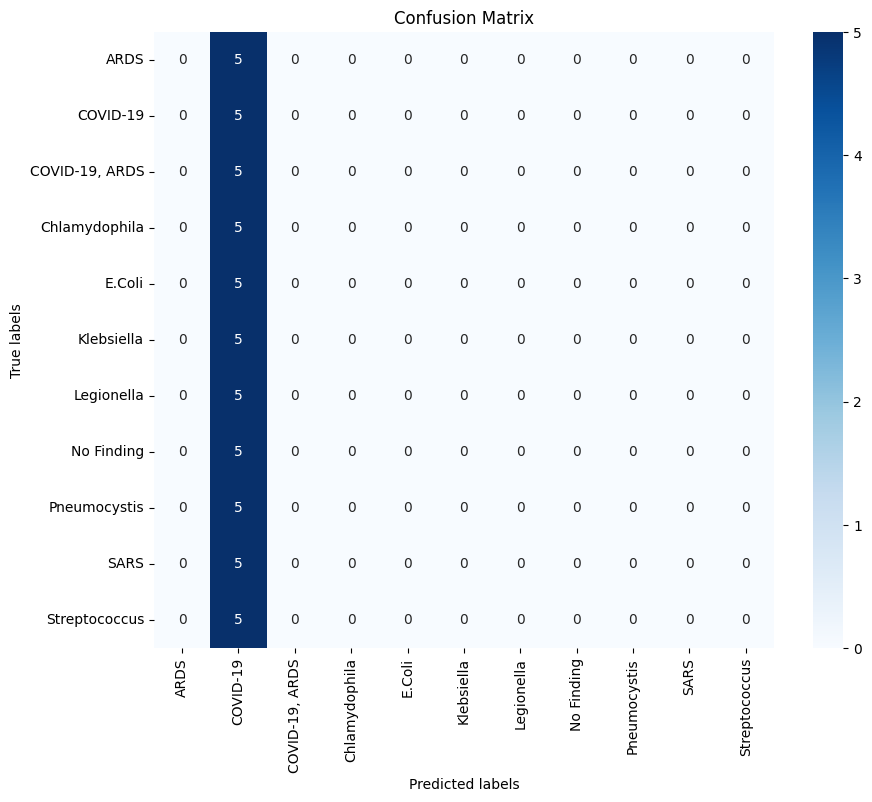

In [ ]:
#SVM pour mon dataset non equilibré
import os
import json
import cv2
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from collections import defaultdict
import random

# Load JSON file containing class annotations
json_file_path = '/content/drive/MyDrive/Colab Notebooks/projet fouilles de données/annotations/imageannotation_ai_lung_bounding_boxes.json'

with open(json_file_path, 'r') as f:
    annotations = json.load(f)

# Set the path to the image folder
image_folder_path = '/content/drive/MyDrive/Colab Notebooks/projet fouilles de données/images/'

# Function to filter images by class
def filter_images_by_class(class_name, annotations):
    filtered_images = []
    for annotation in annotations['images']:
        if annotation['metadata']['finding'] == class_name:
            filtered_images.append(annotation['file_name'])
    return filtered_images

# Load images and labels
X = []
y = []

# Load and preprocess images
for annotation in annotations['images']:
    img_path = annotation['file_name']
    class_name = annotation['metadata']['finding']
    img = cv2.imread(os.path.join(image_folder_path, img_path), cv2.IMREAD_GRAYSCALE)
    # Preprocess the image here if needed
    img_resized = cv2.resize(img, (100, 100))  # Resize all images to the same size (100x100 in this example)
    X.append(img_resized.flatten())  # Flatten the resized image to a 1D array
    y.append(class_name)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Define a custom train-test split function
def custom_train_test_split(X, y, test_size=0.2, num_images_per_class_test=5, random_state=None):
    classes = defaultdict(list)
    for i, label in enumerate(y):
        classes[label].append(i)

    train_indices = []
    test_indices = []
    for class_indices in classes.values():
        n = len(class_indices)
        if n < num_images_per_class_test:
            # Compute the number of additional images needed
            num_additional_images = num_images_per_class_test - n
            # Select random additional images
            additional_images = random.choices(class_indices, k=num_additional_images)
            # Extend the class_indices list
            class_indices.extend(additional_images)
        # Shuffle the indices for randomness
        random.shuffle(class_indices)
        train_indices.extend(class_indices[num_images_per_class_test:])
        test_indices.extend(class_indices[:num_images_per_class_test])

    if random_state is not None:
        random.seed(random_state)
    random.shuffle(train_indices)
    random.shuffle(test_indices)

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

# Utilize custom_train_test_split function to split the data
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, num_images_per_class_test=5, random_state=42)

# Create and train the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



Accuracy with Random Forest: 1.0
Classification Report with Random Forest:
                precision    recall  f1-score   support

          ARDS       1.00      1.00      1.00        24
      COVID-19       1.00      1.00      1.00        24
COVID-19, ARDS       1.00      1.00      1.00        24
 Chlamydophila       1.00      1.00      1.00        24
        E.Coli       1.00      1.00      1.00        24
    Klebsiella       1.00      1.00      1.00        24
    Legionella       1.00      1.00      1.00        24
    No Finding       1.00      1.00      1.00        24
  Pneumocystis       1.00      1.00      1.00        24
          SARS       1.00      1.00      1.00        24
 Streptococcus       1.00      1.00      1.00        24

      accuracy                           1.00       264
     macro avg       1.00      1.00      1.00       264
  weighted avg       1.00      1.00      1.00       264



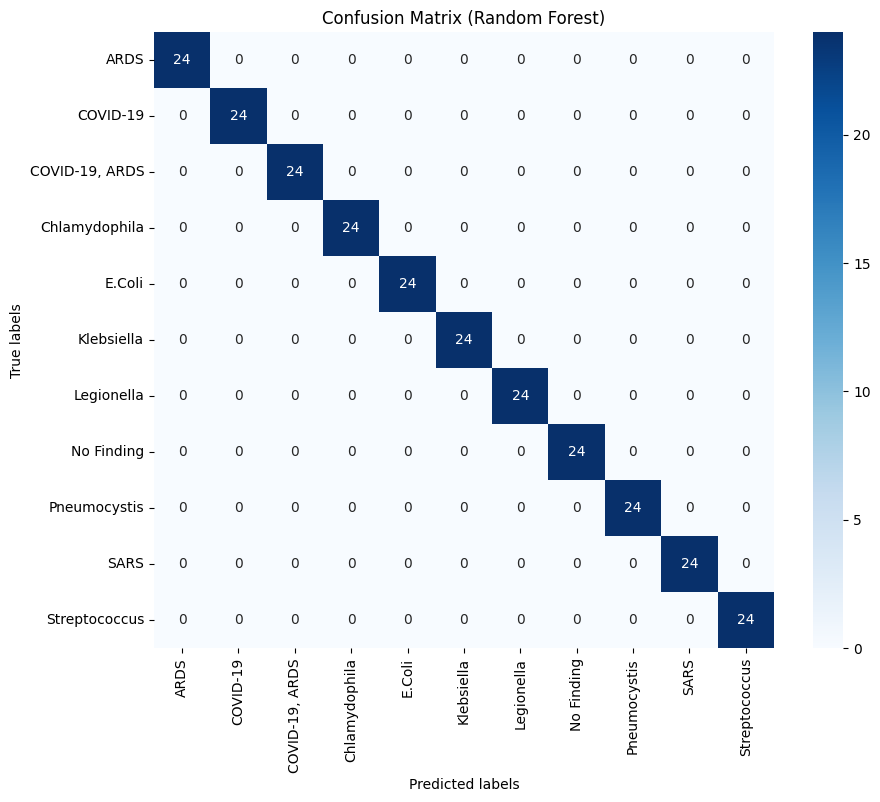

In [ ]:
#RandomForest pour mon dataset equilibré
from sklearn.ensemble import RandomForestClassifier
# Load images and labels
X = []
y = []

for class_name in annotations.keys():
    for img_info in annotations[class_name]:
        img_path = img_info['file_name']  # Extract the file name from the dictionary
        img = cv2.imread(os.path.join(image_folder_path, str(img_path)), cv2.IMREAD_GRAYSCALE)
        # Check if the image is read correctly
        if img is None:
            print(f"Failed to read image: {img_path}")
        # Preprocess the image here if needed
        img_resized = cv2.resize(img, (100, 100))
        X.append(img_resized.flatten())
        y.append(class_name)


# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
# Utilize custom_train_test_split instead of train_test_split
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le classificateur de forêt aléatoire
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_rf = rf_classifier.predict(X_test)

# Évaluer les performances
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy with Random Forest:", accuracy_rf)
print("Classification Report with Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Calculer la matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

Accuracy with Random Forest: 0.6666666666666666
Classification Report with Random Forest:
                precision    recall  f1-score   support

          ARDS       0.00      0.00      0.00         1
      COVID-19       0.67      1.00      0.80        24
COVID-19, ARDS       0.00      0.00      0.00         1
 Chlamydophila       0.00      0.00      0.00         1
        E.Coli       0.00      0.00      0.00         1
    Klebsiella       0.00      0.00      0.00         1
    Legionella       0.00      0.00      0.00         1
    No Finding       0.00      0.00      0.00         1
  Pneumocystis       0.00      0.00      0.00         2
          SARS       0.00      0.00      0.00         2
 Streptococcus       0.00      0.00      0.00         1

      accuracy                           0.67        36
     macro avg       0.06      0.09      0.07        36
  weighted avg       0.44      0.67      0.53        36



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


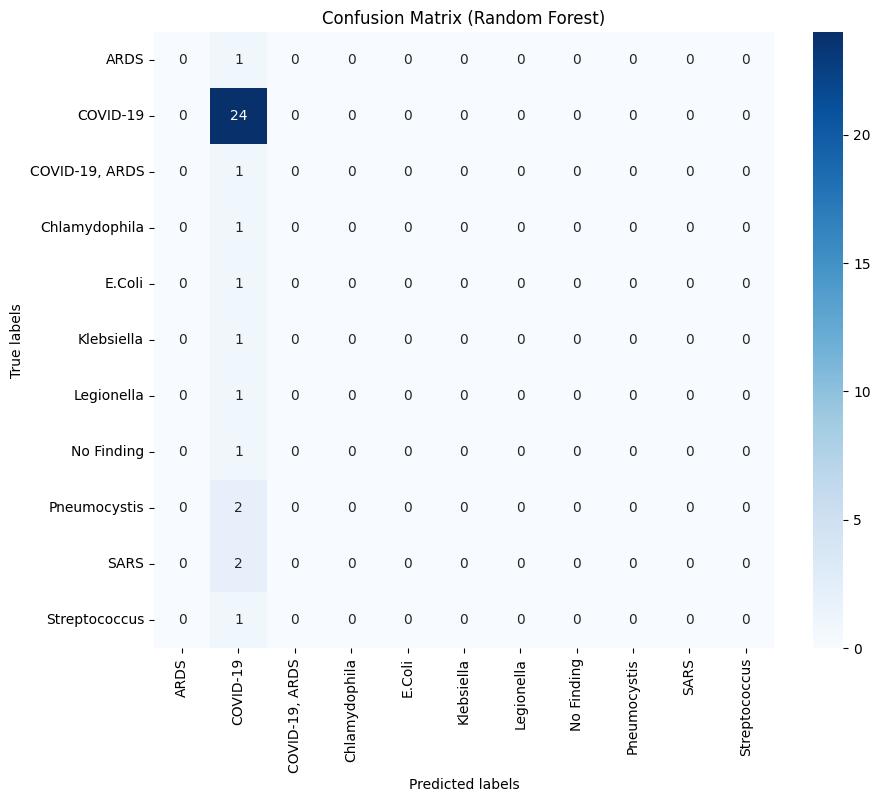

In [ ]:
#RandomForest pour mon dataset non equilibré
from sklearn.ensemble import RandomForestClassifier

# Créer et entraîner le classificateur de forêt aléatoire
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_rf = rf_classifier.predict(X_test)

# Évaluer les performances
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy with Random Forest:", accuracy_rf)
print("Classification Report with Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Calculer la matrice de confusion
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


Accuracy with Gradient Boosting: 0.9924242424242424
Classification Report with Gradient Boosting:
                precision    recall  f1-score   support

          ARDS       1.00      1.00      1.00        24
      COVID-19       1.00      0.92      0.96        24
COVID-19, ARDS       1.00      1.00      1.00        24
 Chlamydophila       1.00      1.00      1.00        24
        E.Coli       1.00      1.00      1.00        24
    Klebsiella       1.00      1.00      1.00        24
    Legionella       1.00      1.00      1.00        24
    No Finding       1.00      1.00      1.00        24
  Pneumocystis       0.96      1.00      0.98        24
          SARS       1.00      1.00      1.00        24
 Streptococcus       0.96      1.00      0.98        24

      accuracy                           0.99       264
     macro avg       0.99      0.99      0.99       264
  weighted avg       0.99      0.99      0.99       264



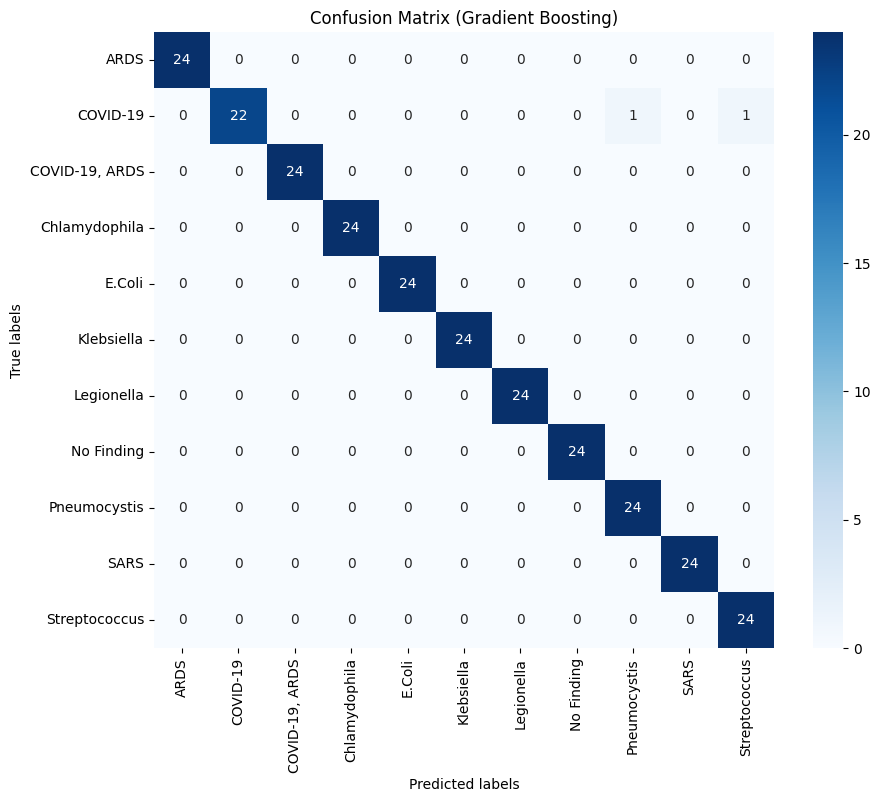

In [ ]:
#GradientBoosting pour mon dataset equilibré
from sklearn.ensemble import GradientBoostingClassifier
# Load images and labels
X = []
y = []

for class_name in annotations.keys():
    for img_info in annotations[class_name]:
        img_path = img_info['file_name']  # Extract the file name from the dictionary
        img = cv2.imread(os.path.join(image_folder_path, str(img_path)), cv2.IMREAD_GRAYSCALE)
        # Check if the image is read correctly
        if img is None:
            print(f"Failed to read image: {img_path}")
        # Preprocess the image here if needed
        img_resized = cv2.resize(img, (100, 100))
        X.append(img_resized.flatten())
        y.append(class_name)


# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
# Utilize custom_train_test_split instead of train_test_split
X_train, X_test, y_train, y_test = custom_train_test_split(X, y, test_size=0.2, random_state=42)


# Créer et entraîner le classificateur Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_gb = gb_classifier.predict(X_test)

# Évaluer les performances
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy with Gradient Boosting:", accuracy_gb)
print("Classification Report with Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Calculer la matrice de confusion
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()

Accuracy with Gradient Boosting: 0.6388888888888888
Classification Report with Gradient Boosting:
                precision    recall  f1-score   support

          ARDS       0.00      0.00      0.00         1
      COVID-19       0.68      0.96      0.79        24
COVID-19, ARDS       0.00      0.00      0.00         1
 Chlamydophila       0.00      0.00      0.00         1
        E.Coli       0.00      0.00      0.00         1
    Klebsiella       0.00      0.00      0.00         1
    Legionella       0.00      0.00      0.00         1
    No Finding       0.00      0.00      0.00         1
  Pneumocystis       0.00      0.00      0.00         2
          SARS       0.00      0.00      0.00         2
 Streptococcus       0.00      0.00      0.00         1

      accuracy                           0.64        36
     macro avg       0.06      0.09      0.07        36
  weighted avg       0.45      0.64      0.53        36



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


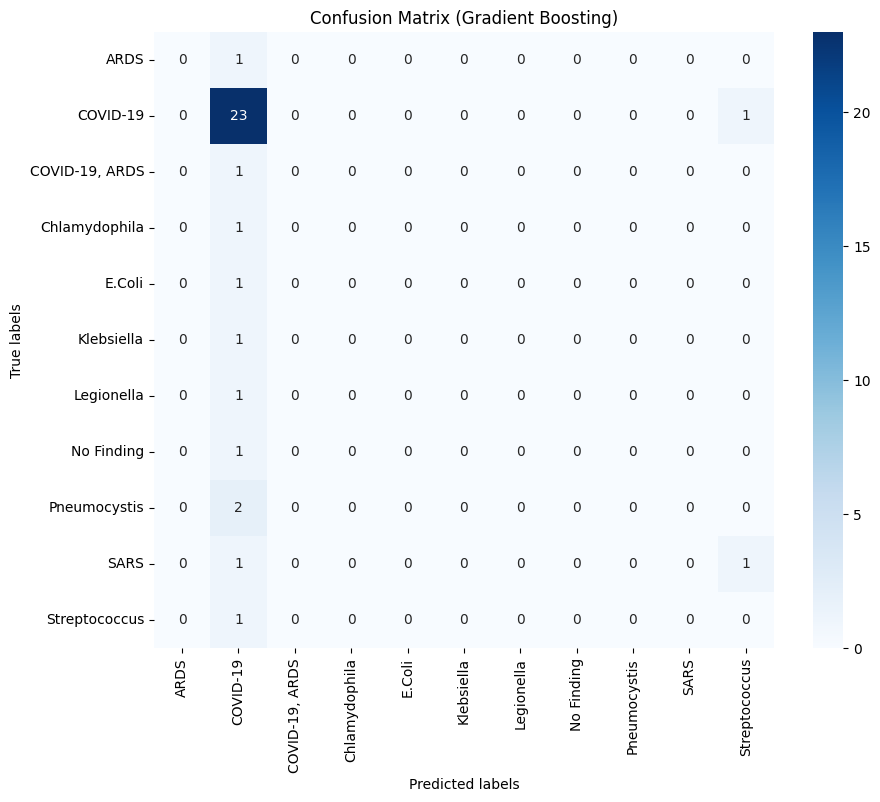

In [ ]:
#GradientBoosting pour mon dataset non equilibré
from sklearn.ensemble import GradientBoostingClassifier

# Créer et entraîner le classificateur Gradient Boosting
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_gb = gb_classifier.predict(X_test)

# Évaluer les performances
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy with Gradient Boosting:", accuracy_gb)
print("Classification Report with Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

# Calculer la matrice de confusion
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Tracer la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gb, annot=True, cmap='Blues', fmt='g', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix (Gradient Boosting)')
plt.show()
